# PHAS2441 Session 2:  Histograms and normal distributions

<div class="alert alert-success"> <p>*  **Intended learning outcomes:** * </p>
By the end of this session, you should be able to:
<ul>
<li> Use Python to generate and plot a histogram; </li>
<li> Determine whether or not the data fits well to a normal distribution </li>
<li> Be able to determine a suitable bin size for a histogram </li>
</div>

The task this session is a "fill-in-the-blanks" style task. This notebook will guide you through what you need to do, and at various points you will find empty code cells that you need to complete in order to proceed.

Rename this notebook so that the title contains your name; when you have completed the task you will upload this notebook to Moodle.

## Getting started: Importing the data

The first thing we need to do is import the modules we will need. In this case we'll be using numpy and matplotlib.pyplot. We'll also tell the notebook to produce all the plots inside the notebook for convenience.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The following line makes all plot output generate as images within the notebook. 
%matplotlib inline

We're going to import some data from a text file into an array using numpy's loadtxt function. Make sure you've downloaded the file "sampledata.txt" from Moodle, and that it is saved in the *same directory/folder as this notebook*. 

The file contains a single column of numbers representing the results of a series of measurements of the same quantity. Use `np.loadtxt` to import the contents of the file into an array called "data". To check that the file has imported correctly, output the array, and also the number of data points. 

Do this in the cell below:

In [2]:
data =  np.sort(np.loadtxt("sampledata.txt")) #sorts data in ascending order; cleans up histogram
print(data)
print("There are", len(data), "data points")

[  7.23139564   7.25066343   7.48937559   7.74509703   7.76131074
   7.87208683   8.03327801   8.06068171   8.14670094   8.1845716
   8.22025163   8.24589252   8.43654124   8.52292597   8.57351232
   8.59089994   8.60092591   8.61044022   8.62930223   8.63909939
   8.64769232   8.68589274   8.70295197   8.75870124   8.78448663
   8.83495279   8.85726152   8.86722039   8.91990775   8.95318402
   8.96221918   9.02998136   9.07832045   9.08197603   9.08784134
   9.08856809   9.14885299   9.15388917   9.1582816    9.16599369
   9.17257793   9.17414148   9.1931196    9.22794451   9.30652172
   9.33637492   9.37932207   9.38621313   9.43335282   9.46076225
   9.47901814   9.512998     9.5262954    9.53082381   9.55931389
   9.59434022   9.59625026   9.60070141   9.60507078   9.60704288
   9.61825119   9.68079423   9.69641951   9.72291147   9.72707314
   9.73394122   9.75736188   9.75819394   9.76819569   9.78448166
   9.79971677   9.81645277   9.84875052   9.89103726   9.90659032
   9.921348

If you've successfully imported the data, you should be able to see that the average value is around 10. We can easily calculate the average:

In [3]:
print("The mean of the data is ", np.mean(data))

The mean of the data is  9.79322812277


### Creating a histogram

In theory, because our data is a set of repeated measurements of the same quantity, the distribution of the values should follow a Gaussian (normal) distribution, i.e. when we plot a histogram of the data, its shape should fit

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp \left[-\frac{(x-\bar{x})^2}{2\sigma^2}\right], $$
where $\bar{x}$ is the mean value of the data, and $\sigma$ the standard deviation.

To see if this is true, we'll first plot the data as a histogram. We'll use the `plt.hist` function to automatically sort the data into bins and plot the resulting histogram:

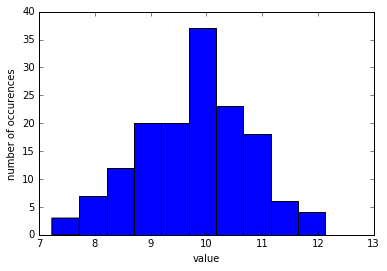

In [4]:
plt.hist(data)
plt.xlabel("value")
plt.ylabel("number of occurences") 

By default, the matplotlib hist command puts the data into 10 bins. You can see all the possible options in the documentation http://matplotlib.org/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist, but in general the only things you're likely to need to change are:
* The number of bins.
* Whether or not the histogram is normalised (normed) - in this case the integral of the histogram will be equal to 1.

For example, this will sort the data into 15 bins, and normalize the histogram:

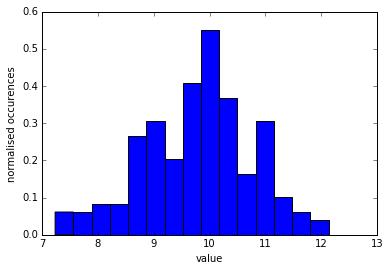

In [5]:
plt.hist(data,bins=15,normed=True) # 15 bins, normalized
plt.xlabel("value")
plt.ylabel("normalised occurences") ; # semicolon at end suppresses unwanted IPython <output>

### How well does this fit to a Gaussian?

Our data looks as though it may be roughly Gaussian. How can we check this?

We'll use another python module: scipy.stats, to find out. (Documentation link: http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html)

In [2]:
import scipy.stats as stats

sys.version_info(major=2, minor=7, micro=12, releaselevel='final', serial=0)


Specifically, we'll use norm.fit to fit the data that we used in the histogram to a Gaussian, and give us the two parameters $\bar{x}$ and $\sigma$.

In [7]:
x0, sigma = stats.norm.fit(data)
print ("Fitted Gaussian: \n Mean value ", x0, "with standard deviation", sigma)

Fitted Gaussian: 
 Mean value  9.79322812277 with standard deviation 0.974322178751


We can see that we obtain the same mean as we got before from np.mean.

Now we want to plot the fitted Gaussian on top of the histogram to see how good the fit is. In the cell below, write a suitably-named function that will return a Gaussian 
$$y = \frac{1}{\sigma \sqrt{2\pi}} \exp \left[-\frac{(x-\bar{x})^2}{2\sigma^2}\right], $$
for an input $x, \bar{x}$, and $\sigma$.


In [8]:
def gaussian_fn(x,x0,sigma):
    '''calculates the Gaussian function y for a normal distribution of parameters mean x0 and standard deviation sigma'''
    y = (1/(sigma*(2*np.pi)**0.5))*np.exp(-(x-x0)**2/(2*sigma**2))
    return y

Now complete the cell below to:
1. use np.linspace to create an array of 100 x-values for the fitted line starting at 7 and finishing at 13
2. Use your function to create a corresponding array of y-values with a Gaussian form.

In [9]:
x = np.linspace(7,13,100)
y = gaussian_fn(x,x0,sigma)

The following cell will replot the (normalised) histogram, a blue line from your generated x and y, and another (red) line.

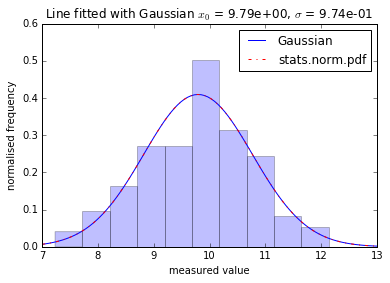

In [10]:
gaussian = stats.norm.pdf(x,x0,sigma) # see next text cell for explanation
plt.hist(data, normed=True,alpha=0.25)
plt.plot(x,y,'b-', label='Gaussian')
plt.plot(x,gaussian,'r-.', label="stats.norm.pdf")
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
title_label=('Line fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x0,sigma))
# n.b. number format 8.2e : exponential format, 8 chars total, with 2 decimal places
plt.title(title_label) ;

If you've done this correctly, you should find that the red dashed line matches *exactly* with your calculated line (the solid blue line). If it doesn't, go back and correct your code until it does!

Let's look at how the red line was generated - it uses the `stats.norm.pdf` function, which generates the probability density function ("pdf"), i.e. a Gaussian, for the given values of x0 and sigma. It's probably easier to use than generating your own Gaussian, so in future you can use this if you wish.

(Note also 
1. the extra option "alpha=0.25" in the hist function - this makes the histogram bars transparent, which makes the graph look a lot more visually clear when you're plotting lines on top of a histogram.
2. The title of the graph includes the fitted parameters by using a Python `.format`. This is often useful to be able to do, so feel free to copy and paste this formatting to other plots if you want.
)

### More data = a better fit?

We only have 150 data points at the moment. To give you an idea of how data distributions become more Gaussian as the data set size increases, we're going to generate some "fake" data so we can easily change the number of data points. 

The numpy function "random" will generate random numbers with a normal distribution for us.

In [24]:
npoints = 100 # the number of data points we want
mean_x = 10 # roughly the same as the data set above
stdev = 1 # roughly the same as the data set above

# Our fake data set. Don't do this in a lab course!
new_data = (np.random.normal(mean_x,stdev,npoints)) #np.sort sorts alphabetically; prevents messy gaussians


In the cell below, 
1. Use stats.norm.fit to find the actual mean and standard deviation of new_data. Are these exactly equal to 10 and 1?
2. Use stats.norm.pdf to generate a set of y values (use the existing set of x values, if you want)
3. Plot a histogram of the data, with the fitted line on top (just as above).
4. Experiment with the number of points, `npoints` in the cell above.
4. Experiment with the number of bins. Do more bins always give better results?
5. Use further text and code cells to demonstrate your results for two or three different scenarios (i.e. vary the bin ranges and/or the number of data points).

Fitted Gaussian: 
 Mean value  10.1289874472 with standard deviation 0.934118446708


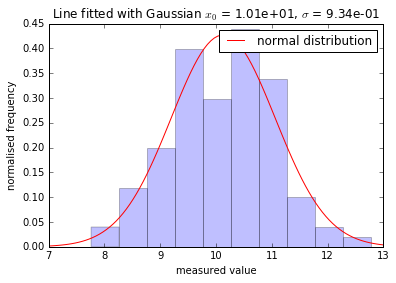

In [25]:
x0, sigma = stats.norm.fit(new_data)
print ("Fitted Gaussian: \n Mean value ", x0, "with standard deviation", sigma)
# fitted values not exactly equal to input values
bins = 10 # sets the number of bins

gaussian = stats.norm.pdf(x,x0,sigma) # generates gaussian curve from stats module
plt.hist(new_data, normed=True,alpha=0.25, bins=bins) # plots a histogram
plt.plot(x,gaussian,'r-', label="normal distribution")
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
title_label=('Line fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x0,sigma))
# n.b. number format 8.2e : exponential format, 8 chars total, with 2 decimal places
plt.title(title_label) ;

### Different numbers of bins and data points
First, let's see what happens when we have a few (100) data points and a few (5) bins:

Fitted Gaussian: 
 Mean value  9.84991059186 with standard deviation 0.956643625446


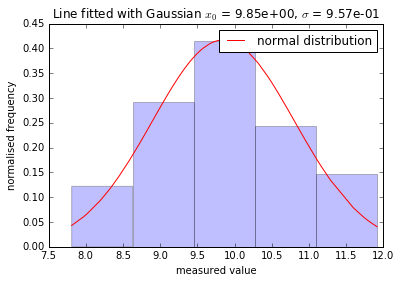

In [26]:
npoints = 100 # the number of data points we want
mean_x = 10 # roughly the same as the data set above
stdev = 1 # roughly the same as the data set above

new_data = np.sort(np.random.normal(mean_x,stdev,npoints))

x0, sigma = stats.norm.fit(new_data)
print ("Fitted Gaussian: \n Mean value ", x0, "with standard deviation", sigma)
# fitted values not exactly equal to input values
bins = 5 # sets the number of bins

gaussian = stats.norm.pdf(new_data,x0,sigma) # generates gaussian curve from stats module
plt.hist(new_data, normed=True,alpha=0.25, bins=bins) # plots a histogram
plt.plot(new_data,gaussian,'r-', label="normal distribution")
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
title_label=('Line fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x0,sigma))
# n.b. number format 8.2e : exponential format, 8 chars total, with 2 decimal places
plt.title(title_label) ;

What about a lot of data points (10000), but only a few bins (5)?

Fitted Gaussian: 
 Mean value  10.0053062985 with standard deviation 0.995039759947


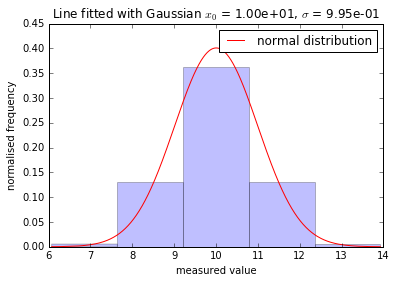

In [27]:
npoints = 10000 # the number of data points we want
mean_x = 10 # roughly the same as the data set above
stdev = 1 # roughly the same as the data set above

new_data = np.sort(np.random.normal(mean_x,stdev,npoints))

x0, sigma = stats.norm.fit(new_data)
print ("Fitted Gaussian: \n Mean value ", x0, "with standard deviation", sigma)
# fitted values not exactly equal to input values
bins = 5 # sets the number of bins

gaussian = stats.norm.pdf(new_data,x0,sigma) # generates gaussian curve from stats module
plt.hist(new_data, normed=True,alpha=0.25, bins=bins) # plots a histogram
plt.plot(new_data,gaussian,'r-', label="normal distribution")
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
title_label=('Line fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x0,sigma))
# n.b. number format 8.2e : exponential format, 8 chars total, with 2 decimal places
plt.title(title_label) ;

What about a few data points (100), but lots of bins (25)?

Fitted Gaussian: 
 Mean value  10.0244684614 with standard deviation 1.10200207552


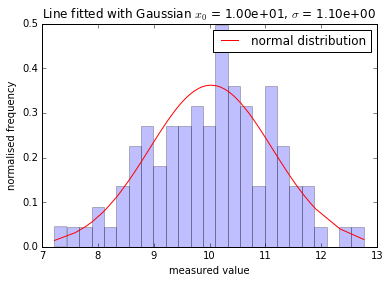

In [28]:
npoints = 100 # the number of data points we want
mean_x = 10 # roughly the same as the data set above
stdev = 1 # roughly the same as the data set above

new_data = np.sort(np.random.normal(mean_x,stdev,npoints))

x0, sigma = stats.norm.fit(new_data)
print ("Fitted Gaussian: \n Mean value ", x0, "with standard deviation", sigma)
# fitted values not exactly equal to input values
bins = 25 # sets the number of bins

gaussian = stats.norm.pdf(new_data,x0,sigma) # generates gaussian curve from stats module
plt.hist(new_data, normed=True,alpha=0.25, bins=bins) # plots a histogram
plt.plot(new_data,gaussian,'r-', label="normal distribution")
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
title_label=('Line fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x0,sigma))
# n.b. number format 8.2e : exponential format, 8 chars total, with 2 decimal places
plt.title(title_label) ;

Finally, lots of bins and lots of data points:

Fitted Gaussian: 
 Mean value  10.0035162856 with standard deviation 1.0066254795


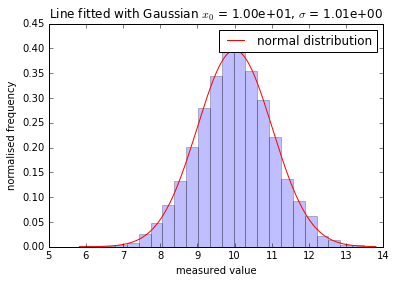

In [29]:
npoints = 10000 # the number of data points we want
mean_x = 10 # roughly the same as the data set above
stdev = 1 # roughly the same as the data set above

new_data = np.sort(np.random.normal(mean_x,stdev,npoints))

x0, sigma = stats.norm.fit(new_data)
print ("Fitted Gaussian: \n Mean value ", x0, "with standard deviation", sigma)
# fitted values not exactly equal to input values
bins = 25 # sets the number of bins

gaussian = stats.norm.pdf(new_data,x0,sigma) # generates gaussian curve from stats module
plt.hist(new_data, normed=True,alpha=0.25, bins=bins) # plots a histogram
plt.plot(new_data,gaussian,'r-', label="normal distribution")
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
title_label=('Line fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x0,sigma))
# n.b. number format 8.2e : exponential format, 8 chars total, with 2 decimal places
plt.title(title_label) ;

And, for good measure, can you have too many bins?

Fitted Gaussian: 
 Mean value  9.99169662884 with standard deviation 1.00234935487


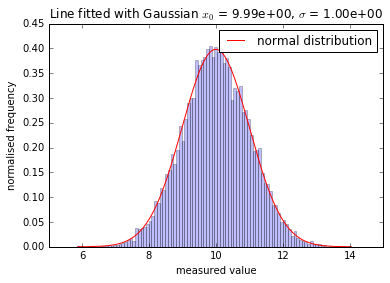

In [32]:
npoints = 10000 # the number of data points we want
mean_x = 10 # roughly the same as the data set above
stdev = 1 # roughly the same as the data set above

new_data = np.sort(np.random.normal(mean_x,stdev,npoints))

x0, sigma = stats.norm.fit(new_data)
print ("Fitted Gaussian: \n Mean value ", x0, "with standard deviation", sigma)
# fitted values not exactly equal to input values
bins = 100 # sets the number of bins

gaussian = stats.norm.pdf(new_data,x0,sigma) # generates gaussian curve from stats module
plt.hist(new_data, normed=True,alpha=0.25, bins=bins) # plots a histogram
plt.plot(new_data,gaussian,'r-', label="normal distribution")
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
title_label=('Line fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x0,sigma))
# n.b. number format 8.2e : exponential format, 8 chars total, with 2 decimal places
plt.title(title_label) ;

No - more bins approximate the Gaussian better, but at a certain point you're just plotting the data as a bar chart!

### When will I need to use this?

Fitting a histogram to a Gaussian is particularly useful when you've fitted some data and want to check how good the fit is. If a fit models the data well, we'd expect the distribution of the *residuals* to be Gaussian.

<div class="alert alert-success"> **Residual**: the (vertical) distance between the data point and the fitted line - we looked at this when we were doing least squares fits in PHAS1240. </div>

This is fairly intuitive. For a good fit, we'd expect roughly as many data points above our fitted line as below, and for most of the data points to be close to the line, with fewer further away.

In sessions 3 and 4, we'll be fitting data to functions, and then using the distribution of the residuals to consider *quantitatively* how well a function fits to our data. 